<a href="https://colab.research.google.com/github/Jaweria-Asif/Automated-News-Categorization-Using-Data-Science-Techniques/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Title**
#**"Automated News Categorization and Analysis Using Machine Learning"**

#**Problem Statement**
With the exponential growth of online news content, manually categorizing and analyzing news articles is time-consuming and inefficient. Dawn's website publishes a variety of news articles daily, making it challenging for users to access information organized by their interests or categories. This project aims to automate the process of categorizing news articles into predefined categories using machine learning models and web scraping techniques. The proposed solution will provide accurate and organized news data, enhancing user experience and enabling efficient data analysis for trends and insights.

#**Business Questions**

1. Which category has the most news articles?
2. Which category generated the highest number of articles on [specific date]?
3. What is the percentage distribution of each news category?
4. How many articles were published in the technology category on its busiest day?
5. What is the peak publication date for the health category, and how many articles were published?"
6. What percentage of news articles relate directly to business and financial markets?
7. Are there noticeable trends in news frequency over time?
8. What are the top-performing categories in terms of engagement (e.g., popularity or readership)?
9. Which category had the fewest articles published on?
10. What are the most common topics or themes across all categories?


***Importing Libraries***

In [38]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from string import punctuation
nltk.download('stopwords')
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***Defining News Categories***

In [39]:
# Define keywords for classification
CATEGORY_KEYWORDS = {
    "political": ["election", "government", "politics", "minister", "policy", "parliament", "vote", "protest", "strikes", "march"],
    "sports": ["match", "tournament", "goal", "cricket", "football", "player", "team"],
    "country": ["Bangladesh", "Pakistan", "India", "China", "Phalestine", "Iran", "America", "England"],
    "business": ["stock", "market", "business", "company", "trade", "corporate", "investment", "liabilities"],
    "economic": ["economy", "inflation", "GDP", "growth", "finance", "budget"],
    "junk science": ["conspiracy", "fake science", "hoax", "pseudoscience", "myth", "debunked"],
    "technology": ["technology", "AI", "artificial intelligence", "software", "gadgets", "innovation", "cybersecurity"],
    "health": ["health", "medicine", "disease", "COVID", "vaccine", "hospital", "mental health"],
    "entertainment": ["movie", "film", "celebrity", "music", "concert", "award", "Netflix"],
    "environment": ["climate", "environment", "global warming", "pollution", "wildlife"],
    "science": ["research", "discovery", "space", "astronomy", "biology", "physics", "chemistry"],
    "education": ["education", "school", "university", "student", "teacher", "admissions", "exam"],
    "crime": ["crime", "murder", "robbery", "fraud", "scam", "arrest", "police"],
    "travel": ["travel", "tourism", "flight", "destination", "vacation", "hotel"],
    "lifestyle": ["lifestyle", "fashion", "food", "recipe", "fitness", "beauty", "trend"],
    "international": ["international", "global", "foreign", "UN", "world", "abroad"],
    "history": ["history", "ancient", "civilization", "war", "revolution", "archaeology", "historical figures"],
    "art & culture": ["art", "painting", "museum", "exhibition", "artist", "sculpture", "culture", "heritage"],
    "law": ["law", "court", "judge", "lawyer", "rights", "constitution", "legislation"],
    "social issues": ["equality", "human rights", "discrimination", "poverty", "justice", "freedom", "activism"],
    "technology & innovation": ["robotics", "automation", "IoT", "blockchain", "5G", "cloud computing", "virtual reality"],
    "food & drink": ["food", "recipe", "cuisine", "restaurant", "dish", "beverage", "nutrition"],
    "parenting & family": ["parenting", "children", "family", "home", "baby", "education", "family life"],
    "transportation": ["transport", "cars", "bikes", "public transport", "traffic", "infrastructure", "commute"],
    "finance": ["investment", "banking", "loans", "credit", "mortgage", "savings", "stock market"],
    "pets & animals": ["pets", "dogs", "cats", "wildlife", "animals", "veterinary", "zoo"],
    "philosophy": ["philosophy", "ethics", "metaphysics", "logic", "thought", "reason", "debate"],
    "weather": ["weather", "forecast", "temperature", "storm", "rain", "snow", "climate change"],
    "automotive": ["cars", "motorcycles", "electric vehicles", "autonomous vehicles", "engine", "car reviews"],
    "music": ["music", "song", "album", "artist", "band", "concert", "soundtrack"],
    "gaming": ["gaming", "video games", "gamer", "console", "e-sports", "streaming", "game review"],
    "literature": ["books", "reading", "author", "novel", "poetry", "literary awards", "book club"],
    "real estate": ["real estate", "property", "housing", "apartment", "mortgage", "landlord", "rental"],
    "religion": ["religion", "faith", "church", "temple", "holy", "spirituality", "belief"],
    "events": ["event", "festival", "conference", "exhibition", "celebration", "concert", "meeting"],
    "technology & gadgets": ["smartphones", "laptops", "gadgets", "wearables", "computers", "AI devices", "electronics"],
    "personal finance": ["budgeting", "savings", "loans", "debt", "retirement", "taxes", "credit scores"],
    "mental health": ["anxiety", "depression", "therapy", "stress", "mindfulness", "well-being", "counseling"],
    "social media": ["social media", "Instagram", "Twitter", "Facebook", "TikTok", "content creation", "influencer"],
    "nonprofit & charity": ["charity", "volunteering", "donation", "NGO", "philanthropy", "social good"],
    "startups & entrepreneurship": ["startup", "entrepreneur", "business plan", "venture capital", "innovation", "founder"],
    "music & performing arts": ["classical music", "jazz", "dance", "theater", "opera", "ballet", "musical"],
    "luxury & fashion": ["luxury", "designer", "high fashion", "couture", "jewelry", "accessories", "fashion trends"],
    "education & learning": ["online courses", "e-learning", "training", "skills development", "certifications", "study tips"],
    "cryptocurrency": ["bitcoin", "blockchain", "cryptocurrency", "ethereum", "NFT", "mining", "decentralized"],
    "podcasts": ["podcast", "audio", "interviews", "talk shows", "discussion", "podcast episodes", "show"],
    "space & astronomy": ["space exploration", "NASA", "planets", "black holes", "telescopes", "astronomical discoveries"],
    "luxury lifestyle": ["luxury homes", "private jets", "yachts", "luxury cars", "high-end lifestyle", "exclusive events"],
    "DIY & crafts": ["DIY", "crafts", "handmade", "home decor", "sewing", "knitting", "upcycling"],
    "virtual & augmented reality": ["VR", "AR", "augmented reality", "virtual reality games", "immersive technology"],
    "shopping & retail": ["shopping", "e-commerce", "sales", "retail", "discounts", "online shopping", "store reviews"],
    "food culture": ["gourmet", "ethnic cuisine", "street food", "food trends", "recipe sharing", "food culture"],
    "humanitarian aid": ["humanitarian", "disaster relief", "aid", "refugees", "crisis", "aid organizations"],
    "sustainability": ["sustainability", "eco-friendly", "green energy", "renewable", "sustainable practices", "green products"],
    "collectibles & antiques": ["collectibles", "antiques", "vintage", "rare items", "collector's items", "auction", "heritage"]
}

# Example of how to access the keywords for a specific category
print(CATEGORY_KEYWORDS["sports"])


['match', 'tournament', 'goal', 'cricket', 'football', 'player', 'team']


In [40]:
# Function to classify categories based on keywords
def classify_category(title, summary):
    content = f"{title} {summary}".lower()
    for category, keywords in CATEGORY_KEYWORDS.items():
        if any(keyword in content for keyword in keywords):
            return category
    return "other"

**Step # 01:**
**Data Collection/Data Scrapping**

(Collecting News Data From Dawn News Paper)

In [41]:
# Function to scrape news from Dawn News
def scrape_dawn_news():
    url = "https://www.dawn.com/latest-news"  # Dawn's latest news page
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to retrieve the page. Status code:", response.status_code)
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    # Finding all news articles
    articles = soup.find_all('article', class_='story')
    news_list = []

    for article in articles:
        try:
            title = article.find('h2', class_='story__title').text.strip()
            link = article.find('a')['href']
            summary = article.find('div', class_='story__excerpt').text.strip() if article.find('div', class_='story__excerpt') else ""

            # Determine category
            category = classify_category(title, summary)

            news_list.append({
                'title': title,
                'link': link,
                'summary': summary,
                'category': category
            })
        except AttributeError:
            continue

    return news_list

In [42]:
# Function to save news data to a CSV file
def save_to_csv(news_list, filename="dawn_news.csv"):
    headers = ['Title', 'Summary', 'Link', 'Category']

    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()

        for news in news_list:
            writer.writerow({
                'Title': news['title'],
                'Summary': news['summary'],
                'Link': news['link'],
                'Category': news['category']
            })

    print(f"Data saved to {filename}")


In [43]:
# Main Function
if __name__ == "__main__":
    print("Scraping news from Dawn...")
    news_list = scrape_dawn_news()

    if not news_list:
        print("No news articles found!")
    else:
        print(f"Found {len(news_list)} articles. Classifying them...")

        # Save to CSV
        save_to_csv(news_list)

        # Display the data
        for idx, news in enumerate(news_list, start=1):
            print(f"\nNews #{idx}")
            print(f"Title: {news['title']}")
            print(f"Summary: {news['summary']}")
            print(f"Link: {news['link']}")
            print(f"Category: {news['category']}")

Scraping news from Dawn...
Found 227 articles. Classifying them...
Data saved to dawn_news.csv

News #1
Title: Putin apologises to Azerbaijan’s Aliyev over ‘tragic incident’ with plane in Russian airspace
Summary: The Kremlin says the call took place at Putin’s request.
Link: https://www.dawn.com/news/1881637/putin-apologises-to-azerbaijans-aliyev-over-tragic-incident-with-plane-in-russian-airspace
Category: science

News #2
Title: South Africa quick bowler Jansen puts the brakes on Pakistan fightback
Summary: Saud Shakeel is 66 not out at tea; South Africa moves close to dismissing tourists.
Link: https://www.dawn.com/news/1881639/south-africa-quick-bowler-jansen-puts-the-brakes-on-pakistan-fightback
Category: other

News #3
Title: Pakistan’s long-standing crisis can be resolved if Nawaz, Imran and Zardari sit together: Rana Sanaullah
Summary: Defence minister Asif suggests "all power centres should be part of negotiations" as "this is not merely the politicians’ problem."
Link: https

***Loading Dawn News Data***

In [44]:
data = pd.read_csv("dawn_news.csv")

***Data Analysis***

In [45]:
print("Data Overview from Top:")
data.head(5)

Data Overview from Top:


,Title,Summary,Link,Category
0,Putin apologises to Azerbaijan’s Aliyev over ‘...,The Kremlin says the call took place at Putin’...,https://www.dawn.com/news/1881637/putin-apolog...,science
1,South Africa quick bowler Jansen puts the brak...,Saud Shakeel is 66 not out at tea; South Afric...,https://www.dawn.com/news/1881639/south-africa...,other
2,Pakistan’s long-standing crisis can be resolve...,"Defence minister Asif suggests ""all power cent...",https://www.dawn.com/news/1881632/pakistans-lo...,political
3,PM says overbilling by power firms unacceptabl...,Meeting chaired by PM Shehbaz reviews Discos' ...,https://www.dawn.com/news/1881623/pm-says-over...,history
4,Germany says latest undersea cable cut a ‘wake...,Nato bolsters military presence in Baltic Sea ...,https://www.dawn.com/news/1881630/germany-says...,literature


In [70]:
print("Data Overview from Bottom:")
data.tail(5)

Data Overview from Bottom:


,Summary,Category,New Data
222,The history of Pakistan’s civilian and politic...,17,history pakistans civilian political movements...
223,As we close the calendar on 2024 and embark on...,4,close calendar 2024 embark 2025 data tells us ...
224,The same policies that threaten our exports to...,1,policies threaten exports us could create oppo...
225,British collections bulge with artefacts taken...,0,british collections bulge artefacts taken mili...
226,Urban gentrification has managed to reproduce ...,21,urban gentrification managed reproduce precise...


In [47]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     227 non-null    object
 1   Summary   206 non-null    object
 2   Link      227 non-null    object
 3   Category  227 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


In [48]:
print("Data Describe: ")
data.describe()

Data Describe: 


,Title,Summary,Link,Category
count,227,206,227,227
unique,158,148,158,23
top,PIA includes ATR aircraft into operational duty,Meeting chaired by PM Shehbaz reviews Discos' ...,https://www.dawn.com/news/1881468/pia-includes...,other
freq,3,3,3,63


***Step # 03: Exploratory Data Analysis / Visualization***

<ipython-input-72-8cfe353d15a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


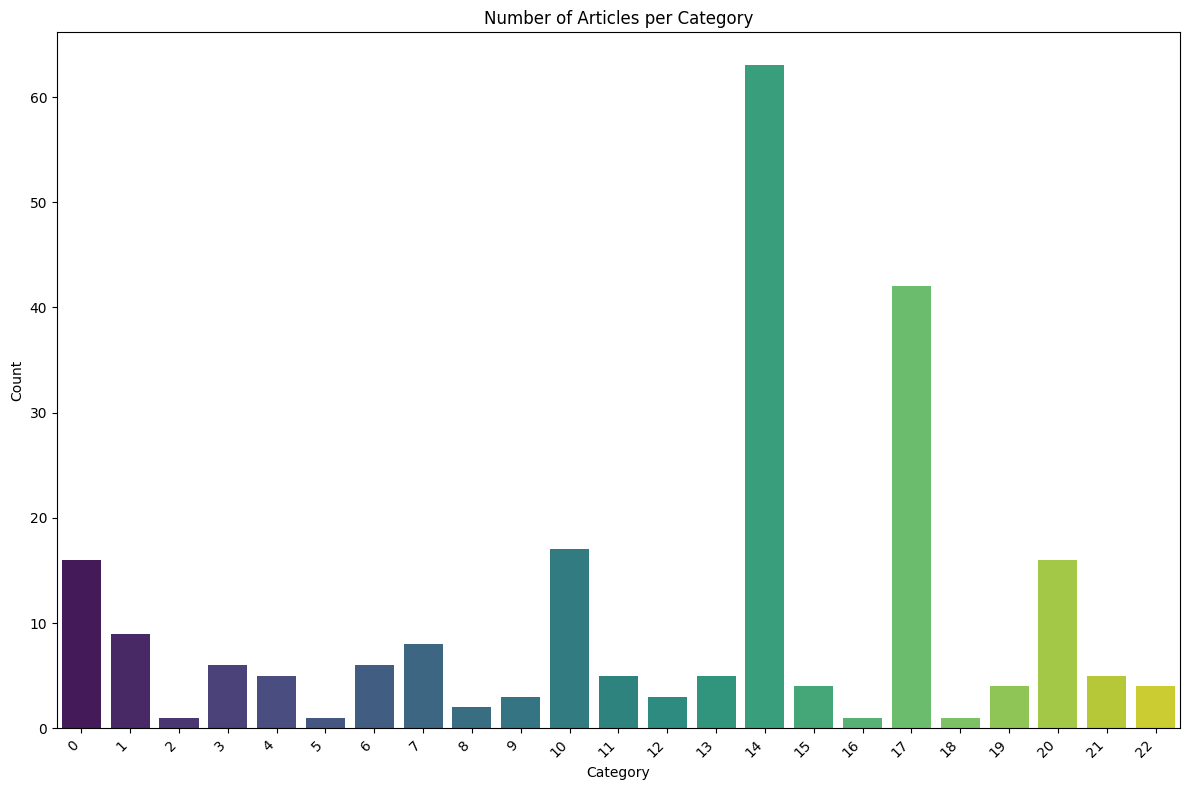

In [72]:
# Visualize Category Distribution or Calculate the counts of each category
category_counts = data['Category'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Articles per Category")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<ipython-input-50-fd00f3df354e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="viridis")


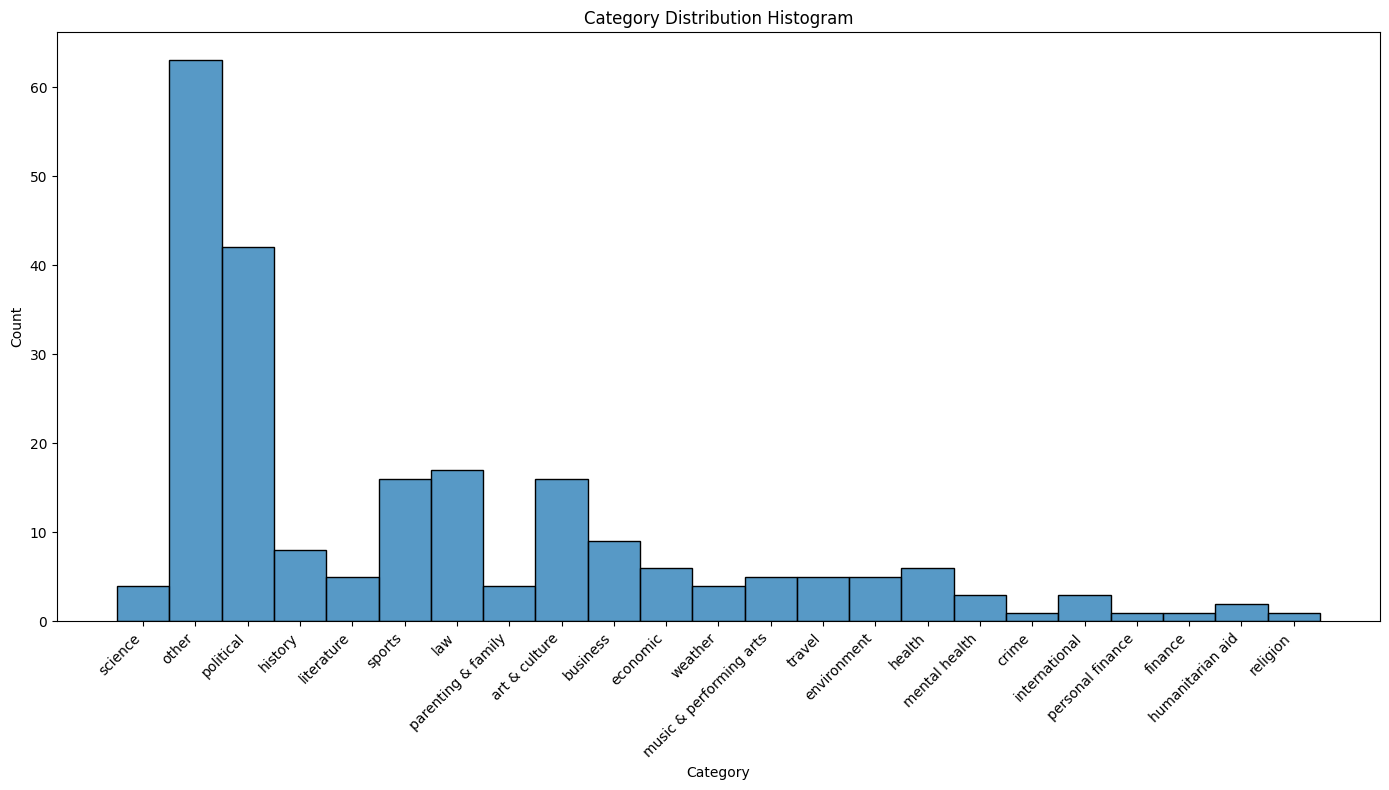

In [50]:
# Visualize Category Distribution (Histogram)
plt.figure(figsize=(14, 8))
sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="viridis")
plt.title("Category Distribution Histogram")
plt.xlabel("Category")
plt.ylabel("Count")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

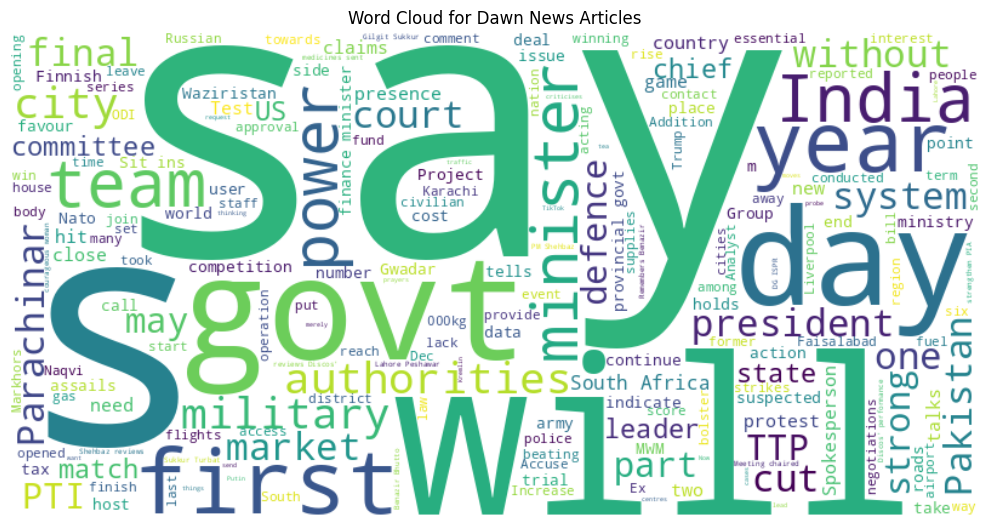

In [87]:
text_data = " ".join(data['Summary'].dropna())  # Join all text into one large string, handling NaN values

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis for a cleaner view
plt.title('Word Cloud for Dawn News Articles')
plt.tight_layout()
plt.show()

***Step # 02: Text Pre-Processing***

***Count Null Values***

In [52]:
count=data.isnull().sum().sort_values(ascending=False)
percentage=((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
print("Count and Percentage of missing values for the columns: ")
missing_data

Count and Percentage of missing values for the columns: 


,Count,Percentage
Summary,21,9.251101
Title,0,0.000000
Link,0,0.000000
Category,0,0.000000


***Replace Null Values with "Missing"***

In [53]:
# Fill missing values with "missing" for 'Title' and 'Summary' columns
data['Title'] = data['Title'].fillna("missing")
data['Summary'] = data['Summary'].fillna("missing")

# Verification
print(data.isnull().sum())

Title       0
Summary     0
Link        0
Category    0
dtype: int64


***Drop Unnecessary Columns***

In [54]:
data.drop(columns=['Title','Link'],inplace=True)
data.head()

,Summary,Category
0,The Kremlin says the call took place at Putin’...,science
1,Saud Shakeel is 66 not out at tea; South Afric...,other
2,"Defence minister Asif suggests ""all power cent...",political
3,Meeting chaired by PM Shehbaz reviews Discos' ...,history
4,Nato bolsters military presence in Baltic Sea ...,literature


***Encoding Labels in Numeric Format***

In [55]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
data['Category'] = label_encoder.fit_transform(data['Category'])

# To see the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'art & culture': 0, 'business': 1, 'crime': 2, 'economic': 3, 'environment': 4, 'finance': 5, 'health': 6, 'history': 7, 'humanitarian aid': 8, 'international': 9, 'law': 10, 'literature': 11, 'mental health': 12, 'music & performing arts': 13, 'other': 14, 'parenting & family': 15, 'personal finance': 16, 'political': 17, 'religion': 18, 'science': 19, 'sports': 20, 'travel': 21, 'weather': 22}


***Verifying Conversion***

In [56]:
labels=data.Category
labels.head()

,Category
0,19
1,14
2,17
3,7
4,11


***Removing Stop Words and Doing Lemmatization (Text Pre-Processing)***

In [57]:
def clean_input(text, remove_stop_words=True, lemmatize_words=False):
    stop_words = set(stopwords.words('english'))  # Load NLTK stopwords
    text = text.lower()
    text = re.sub(r"http\S+", "link", text)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\bI\b", "I am", text)
    text = re.sub(r"\bur\b", "your", text)
    text = re.sub(r"\band\b", " and ", text)
    text = re.sub(r"\bd\b", " would", text)
    text = re.sub(r"\b11\b", "will", text)
    text = re.sub(r"\bc\b", "can", text)
    text = re.sub(r"\breg\b", "eg", text)
    text = re.sub(r"\btkts\b", "tickets", text)
    text = re.sub(r"\bru\b", "you", text)
    text = "".join([c for c in text if c not in punctuation])
    words = text.split()
    if remove_stop_words:
        words = [w for w in words if w not in stop_words]
    cleaned_text = " ".join(words)
    return cleaned_text

***Cleaning each Row of Dataset using Lambda Clean input()***

In [58]:
cleaned1=lambda x: clean_input(x)
data['New Data'] = pd.DataFrame(data.Summary.apply(cleaned1))
data.head(10)


,Summary,Category,New Data
0,The Kremlin says the call took place at Putin’...,19,kremlin says call took place putins request
1,Saud Shakeel is 66 not out at tea; South Afric...,14,saud shakeel 66 tea south africa moves close d...
2,"Defence minister Asif suggests ""all power cent...",17,defence minister asif suggests power centres p...
3,Meeting chaired by PM Shehbaz reviews Discos' ...,7,meeting chaired pm shehbaz reviews discos perf...
4,Nato bolsters military presence in Baltic Sea ...,11,nato bolsters military presence baltic sea fin...
5,Karachi traffic police says Sharea Faisal goin...,17,karachi traffic police says sharea faisal goin...
6,We've listed our favourite things this year an...,20,weve listed favourite things year things want ...
7,"“Now [that] I’m thinking about it, I’m for Tik...",10,im thinking im tiktok need competition trump says
8,"Honours led by president with Modi, Bhutan kin...",15,honours led president modi bhutan king attenda...
9,The actor was 15 when she and her co-lead Leon...,14,actor 15 colead leonard whiting starred oscarw...


***Creating a Copy of Clean Text***

In [59]:
new_train=data['New Data'].copy()
new_train.head()

,New Data
0,kremlin says call took place putins request
1,saud shakeel 66 tea south africa moves close d...
2,defence minister asif suggests power centres p...
3,meeting chaired pm shehbaz reviews discos perf...
4,nato bolsters military presence baltic sea fin...


***Step # 04(i) : Splitting Data into Training and Testing***

In [60]:
x_train,x_test,y_train,y_test=train_test_split(new_train,labels, test_size=0.3, random_state=10)

***Step # 04(ii) : Modelling***

***Using TF-IDF***

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)

tfidf_val = tfidf_vectorizer.transform(x_test)


***Using Logistic Regression***

In [62]:
LogReg = LogisticRegression(max_iter=100)

LogReg.fit(tfidf_train, y_train)

Pred_LogReg = LogReg.predict(tfidf_val)

Accuracy_LogReg = metrics.accuracy_score(y_test, Pred_LogReg)

Accuracy_LogReg = round(Accuracy_LogReg * 100, 2)
print(f'Accuracy of Logistic Regression Model is: {Accuracy_LogReg}%')

Accuracy of Logistic Regression Model is: 36.23%


***Using Decission Tree***

In [63]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(tfidf_train, y_train)
Pred_DT = dt_classifier.predict(tfidf_val)
Accuracy_DT = metrics.accuracy_score(y_test, Pred_DT)
Accuracy_DT = round(Accuracy_DT * 100, 2)
print(f'Accuracy of Decision Tree Model is: {Accuracy_DT}%')

Accuracy of Decision Tree Model is: 56.52%


***Using Random forest***

In [64]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(tfidf_train, y_train)
Pred_RF = rf_classifier.predict(tfidf_val)
Accuracy_RF = metrics.accuracy_score(y_test, Pred_RF)
Accuracy_RF = round(Accuracy_RF * 100, 2)
print(f'Accuracy of Random Forest Model is: {Accuracy_RF}%')

Accuracy of Random Forest Model is: 55.07%


***Using Voting Classifier combining DT, RF, LR Predictions using Majority Voting***

In [65]:
# Define the three models for the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('Logistic Regression', LogReg),
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier)
], voting='soft')
# Fit the voting classifier on the training data
voting_clf.fit(tfidf_train, y_train)
# Predict using the trained voting classifier
Pred_Voting = voting_clf.predict(tfidf_val)
# Calculate the accuracy of the voting classifier
Accuracy_Voting = accuracy_score(y_test, Pred_Voting)
Accuracy_Voting = round(Accuracy_Voting * 100, 2)
# Print the accuracy of the voting classifier
print(f'Accuracy of Voting Classifier is: {Accuracy_Voting}%')

Accuracy of Voting Classifier is: 56.52%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ran

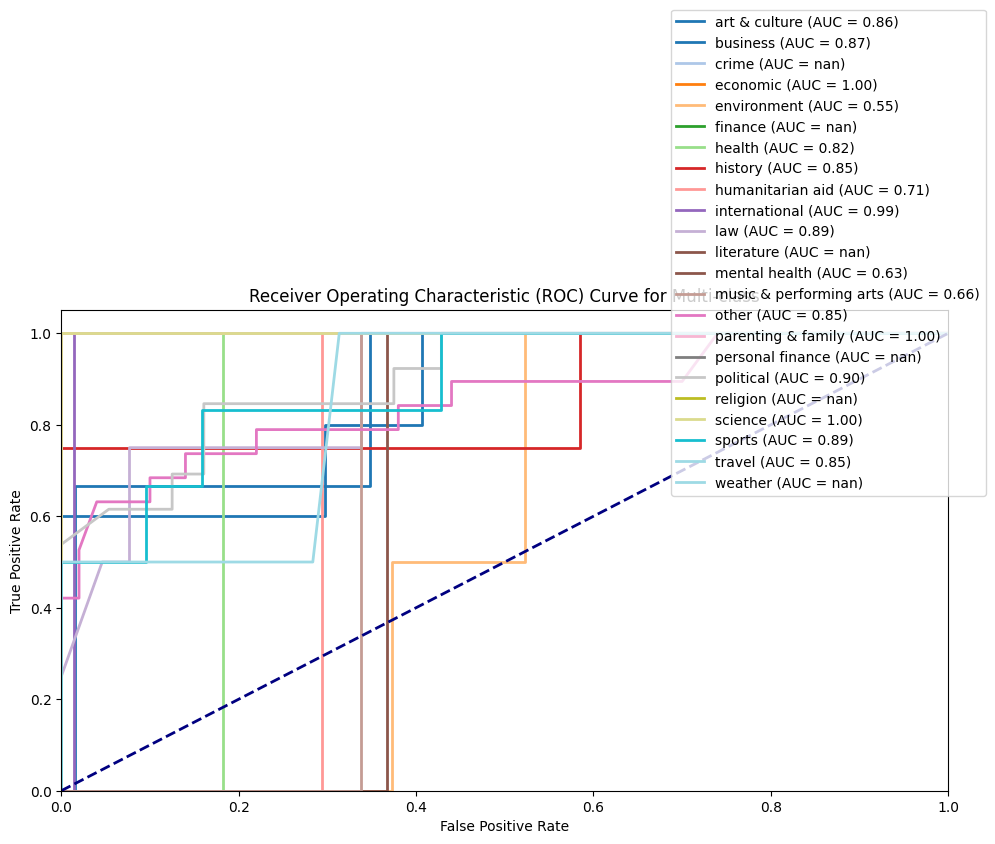

Accuracy of Voting Classifier is: 55.07%


In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Define the classes mapping
class_mapping = {
    'art & culture': 0, 'business': 1, 'crime': 2, 'economic': 3, 'environment': 4,
    'finance': 5, 'health': 6, 'history': 7, 'humanitarian aid': 8, 'international': 9,
    'law': 10, 'literature': 11, 'mental health': 12, 'music & performing arts': 13,
    'other': 14, 'parenting & family': 15, 'personal finance': 16, 'political': 17,
    'religion': 18, 'science': 19, 'sports': 20, 'travel': 21, 'weather': 22
}

# Define the three models for the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('Logistic Regression', LogReg),
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier)
], voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(tfidf_train, y_train)

# Predict the probabilities using the trained voting classifier
y_probs = voting_clf.predict_proba(tfidf_val)

# Binarize the true labels for multi-class ROC calculation
y_test_bin = label_binarize(y_test, classes=list(class_mapping.values()))

# Calculate ROC curve and AUC for each class
n_classes = len(class_mapping)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab20', n_classes)  # Use a color map with enough colors
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2, label=f'{list(class_mapping.keys())[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Format the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

# Calculate the accuracy of the voting classifier
Pred_Voting = voting_clf.predict(tfidf_val)
Accuracy_Voting = accuracy_score(y_test, Pred_Voting)
Accuracy_Voting = round(Accuracy_Voting * 100, 2)

# Print the accuracy of the voting classifier
print(f'Accuracy of Voting Classifier is: {Accuracy_Voting}%')


***Results & Comparision***

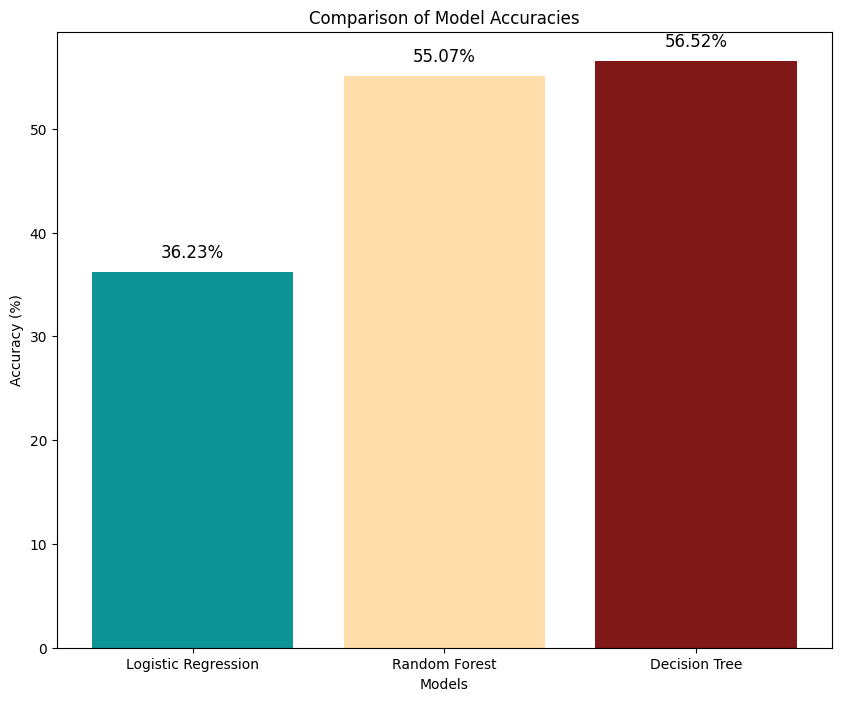

In [66]:
# Models and accuracies for comparison (3 models)
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [Accuracy_LogReg, Accuracy_RF, Accuracy_DT]  # Replace with actual accuracy values

# Create bar plot
plt.figure(figsize=(10, 8))
bars = plt.bar(models, accuracies, color=['#0D9494', '#FFDDAA', '#801818'])  # Custom colors for better contrast

# Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')

# Add accuracy labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}%', ha='center', va='bottom', fontsize=12)

# Display plot
plt.show()


***Business Questions / Insights***

In [76]:
#data = pd.read_csv("dawn_news.csv")

In [77]:
# 1. Which category has the most news articles?
most_articles_category = data['Category'].value_counts().idxmax()
print(f"Category with the most news articles: {most_articles_category}")

Category with the most news articles: other


In [78]:
# 3. What is the percentage distribution of each news category?
category_percentage = data['Category'].value_counts(normalize=True) * 100
print("\nPercentage distribution of each news category:")
print(category_percentage)


Percentage distribution of each news category:
Category
other                      27.753304
political                  18.502203
law                         7.488987
sports                      7.048458
art & culture               7.048458
business                    3.964758
history                     3.524229
health                      2.643172
economic                    2.643172
environment                 2.202643
literature                  2.202643
music & performing arts     2.202643
travel                      2.202643
science                     1.762115
weather                     1.762115
parenting & family          1.762115
mental health               1.321586
international               1.321586
humanitarian aid            0.881057
crime                       0.440529
personal finance            0.440529
finance                     0.440529
religion                    0.440529
Name: proportion, dtype: float64


In [79]:
# 6. What percentage of news articles relate directly to business and financial markets?
business_category_df = data[data['Category'].str.contains('Business|Finance', case=False)]
business_percentage = (business_category_df.shape[0] / data.shape[0]) * 100
print(f"Percentage of news articles related to Business and Financial markets: {business_percentage:.2f}%")


Percentage of news articles related to Business and Financial markets: 4.85%


In [80]:
# 8. What are the top-performing categories in terms of engagement (e.g., popularity or readership)?
top_categories_by_articles = data['Category'].value_counts().head(5)
print("\nTop performing categories based on number of articles:")
print(top_categories_by_articles)


Top performing categories based on number of articles:
Category
other            63
political        42
law              17
sports           16
art & culture    16
Name: count, dtype: int64


In [81]:
# 9. Which category had the fewest articles published on?
fewest_articles_category = data['Category'].value_counts().idxmin()
print(f"Category with the fewest articles published: {fewest_articles_category}")

Category with the fewest articles published: crime
